In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
# %matplotlib notebook

In [2]:
# Importing the satellite remote sensing measurment data for Sea Surface Temperature (SST)
# for the Central Great Barrier Reef Region
# Source Link(NOAA website): https://coralreefwatch.noaa.gov/product/vs/data.php

SST_data = pd.read_fwf('Resources/gbr_central.txt')
SST_data

,YYYY,MM,DD,SST_MIN,SST_MAX,SST@90th_HS,SSTA@90th_HS,90th_HS>0,DHW_from_90th_HS>1,BAA_7day_max
0,1985,1,1,27.92,28.32,28.07,0.6058,0.12,0.0000,0
1,1985,1,2,27.85,28.33,28.01,0.5865,0.10,0.0000,0
2,1985,1,3,27.87,28.47,28.01,0.4874,0.06,0.0000,0
3,1985,1,4,27.82,28.58,27.97,0.4903,0.04,0.0000,0
4,1985,1,5,27.95,28.73,28.07,0.5616,0.13,0.0000,0
...,...,...,...,...,...,...,...,...,...,...
12872,2020,3,30,26.88,28.06,27.85,0.8032,0.00,10.6086,0
12873,2020,3,31,26.97,28.13,27.71,0.6958,0.00,10.6086,0
12874,2020,4,1,27.01,28.03,27.58,0.6655,0.00,10.6086,0
12875,2020,4,2,27.14,28.01,27.66,0.7432,0.00,10.6086,0


In [3]:
# Renaming columns
SST_data = SST_data.rename(columns={'YYYY': 'Year',
                           'MM': 'Month',
                           'DD': 'Day'
                          })

SST_data['Date'] = SST_data['Month'].astype(str)+ '/'+ SST_data['Day'].astype(str) \
                    + '/' + SST_data['Year'].astype(str)

SST_data = SST_data[['Year','Month','Day', 'Date','SST_MIN','SST_MAX','SST@90th_HS','90th_HS>0','DHW_from_90th_HS>1']]
SST_data

,Year,Month,Day,Date,SST_MIN,SST_MAX,SST@90th_HS,90th_HS>0,DHW_from_90th_HS>1
0,1985,1,1,1/1/1985,27.92,28.32,28.07,0.12,0.0000
1,1985,1,2,1/2/1985,27.85,28.33,28.01,0.10,0.0000
2,1985,1,3,1/3/1985,27.87,28.47,28.01,0.06,0.0000
3,1985,1,4,1/4/1985,27.82,28.58,27.97,0.04,0.0000
4,1985,1,5,1/5/1985,27.95,28.73,28.07,0.13,0.0000
...,...,...,...,...,...,...,...,...,...
12872,2020,3,30,3/30/2020,26.88,28.06,27.85,0.00,10.6086
12873,2020,3,31,3/31/2020,26.97,28.13,27.71,0.00,10.6086
12874,2020,4,1,4/1/2020,27.01,28.03,27.58,0.00,10.6086
12875,2020,4,2,4/2/2020,27.14,28.01,27.66,0.00,10.6086


In [5]:
# Filtering data for years 2000 - 2020
# data = SST_data.loc[(SST_data['Year']>1999) & (SST_data['Year']<2020)]
# data.reset_index(drop=True, inplace=True)
# data

In [4]:
# Source link: https://coralreefwatch.noaa.gov/product/vs/data/gbr_central.txt
# Long-term mean temperature for each month (Jan-Dec)
averaged_monthly_mean = [28.2080, 28.3422, 27.7395, 26.6994, 25.3221, 23.6220,
                         22.7473, 22.7427, 23.6184, 25.0898, 26.6232, 27.4833]

# Modified the order for averaged_monthly_mean (April to March)
modified_averaged_monthly_mean = [ 26.6994, 25.3221, 23.6220, 22.7473, 22.7427,23.6184,
                                  25.0898, 26.6232, 27.4833, 28.2080, 28.3422, 27.7395]

averaged_max_monthly_mean = max(averaged_monthly_mean)
print(f"The value of maximum monthly mean for Central Region of GBR is {averaged_max_monthly_mean} degree Celcius.")

# Bleaching Threshold is 1° C more than max average month temperature
bleaching_threshold = averaged_max_monthly_mean + 1
print(f"The value of bleaching threshold for Central Region of GBR is {bleaching_threshold} degree Celcius.")

The value of maximum monthly mean for Central Region of GBR is 28.3422 degree Celcius.
The value of bleaching threshold for Central Region of GBR is 29.3422 degree Celcius.


Scientists have shown that corals start to become stressed when the SST is 1°C warmer than the highest monthly mean temperature 
Glynn, P. W. and L. D'Croz, 1990. Experimental evidence for high temperature stress as the cause of El Niño coincident coral mortality. Coral Reefs, 8, 181-191.

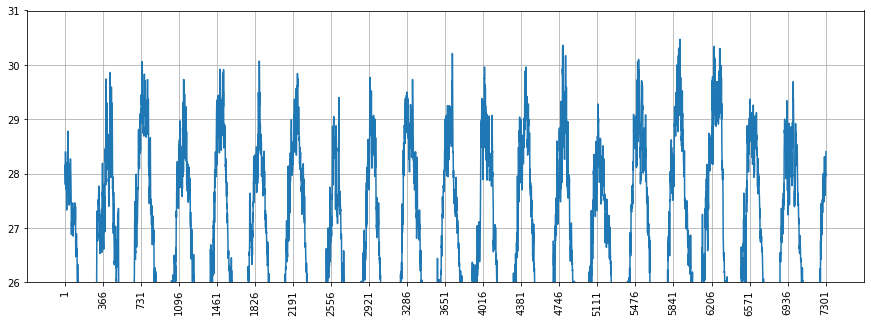

In [254]:
#DO NOT RUN CODE

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 1, 1)

major_ticks = np.arange(1, 7307, 365)
# major_ticks = np.arange(2000,2020,1)
ax.set_xticks(major_ticks)

plt.plot(data['SST@90th_HS'])
plt.xticks(rotation=90)
# plt.xlim(2000,2019)
plt.ylim(26,31)

plt.grid()
plt.show()


When the SST is warmer than the bleaching threshold temperature, the corals will experience thermal stress. This thermal stress is the main cause of mass coral bleaching.

We need some way to measure not only how far the temperature is above the threshold, but how long it has stayed above that point. This is what the 50-km Degree Heating Week (DHW)

The DHW shows how much heat stress has accumulated in an area over the past 12 weeks (3 months)

when the thermal stress reaches four degree C-weeks, you can expect to see significant coral bleaching, especially in more sensitive species. When thermal stress reaches eight degree C-weeks or higher, you would likely see widespread bleaching and mortality from the thermal stress.

In [5]:
# Changing the index to 'Date' column
modified_data = SST_data.set_index('Date')

# Creating a new dataframe for last 5 years
five_year_data = modified_data.loc['4/1/2015':,]

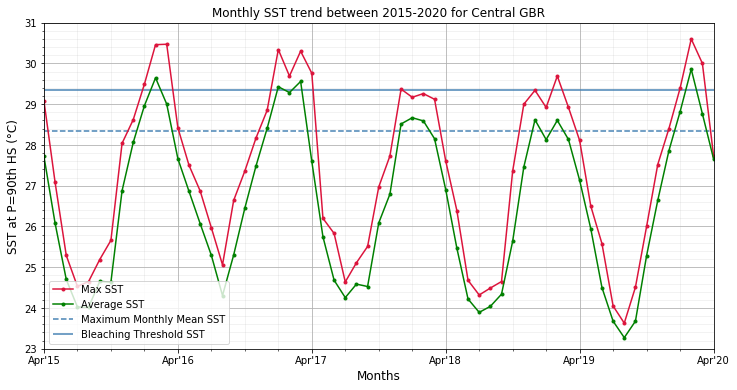

In [6]:
# Grouping the five year data by year and month
five_year_grouped = five_year_data.groupby(['Year','Month'])
mean_five_year_grouped = five_year_grouped.mean()
max_five_year_grouped = five_year_grouped.max()

x_axis = np.arange(1,62,1)

max_SST = max_five_year_grouped['SST@90th_HS']
mean_SST = mean_five_year_grouped['SST@90th_HS']
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(x_axis, max_SST, label= "Max SST", color= 'crimson', marker ='.')
plt.plot(x_axis, mean_SST, label= "Average SST", color= 'green', marker ='.')
plt.hlines(averaged_max_monthly_mean, 1, 61, color='steelblue', 
           label='Maximum Monthly Mean SST', linestyle='dashed')
plt.hlines(bleaching_threshold, 1, 61, color='steelblue', label='Bleaching Threshold SST')
plt.xlim(1,61)
plt.ylim(23,31)
major_xticks = np.arange(1, 62, 12)
minor_xticks = np.arange(1, 62, 3)
minor_yticks = np.arange(23,31,0.2)
ax.set_xticks(major_xticks)
ax.set_xticklabels(["Apr'15","Apr'16", "Apr'17", "Apr'18", "Apr'19", "Apr'20"], fontsize=10)
ax.set_xticks(minor_xticks, minor = True)
ax.set_yticks(minor_yticks, minor = True)
# plt.xticks(x_axis)
plt.title('Monthly SST trend between 2015-2020 for Central GBR', fontsize=12)
plt.xlabel('Months', fontsize=12)
plt.ylabel('SST at P=90th HS (°C)', fontsize=12)
plt.legend(loc='lower left')
plt.grid()
ax.grid(which='minor', alpha=0.2)
plt.show()

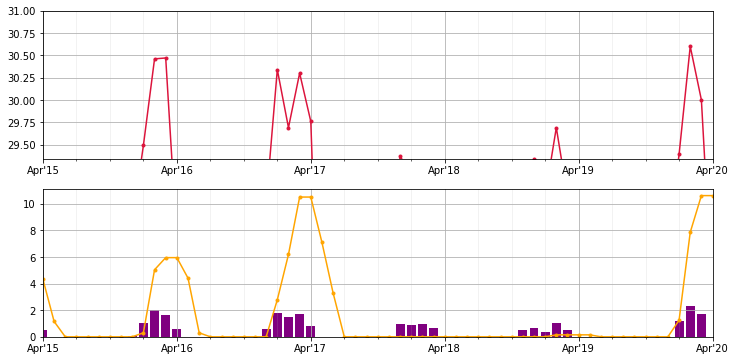

AxesSubplot(0.125,0.536818;0.775x0.343182)
AxesSubplot(0.125,0.125;0.775x0.343182)


In [7]:
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(12,6), sharex=False, sharey= False)
ax1 = axes[0]
ax2 = axes[1]
ax1.plot(x_axis, max_SST, label= "Max SST", color= 'crimson', marker ='.')
ax1.set_xlim(1,61)
ax1.set_ylim(29.34,31)
major_xticks = np.arange(1, 62, 12)
minor_xticks = np.arange(1, 62, 3)
# minor_yticks = np.arange(23,31,0.2)
ax1.set_xticks(major_xticks)
ax1.set_xticklabels(["Apr'15","Apr'16", "Apr'17", "Apr'18", "Apr'19", "Apr'20"], fontsize=10)
ax1.set_xticks(minor_xticks, minor = True)
# ax1.set_yticks(minor_yticks, minor = True)

# plt.title('Monthly SST trend between 2015-2020 for Central GBR', fontsize=12)
# plt.xlabel('Months', fontsize=12)
# plt.ylabel('SST at P=90th HS (°C)', fontsize=12)
# plt.legend(loc='lower left')
ax1.grid()
ax1.grid(which='minor', alpha=0.2)



max_HS = max_five_year_grouped['90th_HS>0']
max_DHW = max_five_year_grouped['DHW_from_90th_HS>1']

ax2.bar(x_axis, max_HS, label= "Max HS", color= 'purple')
ax2.plot(x_axis, max_DHW, label= "Max DHW", color= 'orange', marker ='.')

ax2.set_xticks(major_xticks)
ax2.set_xticklabels(["Apr'15","Apr'16", "Apr'17", "Apr'18", "Apr'19", "Apr'20"], fontsize=10)
ax2.set_xticks(minor_xticks, minor = True)
ax2.set_xlim(1,61)
ax2.grid()
ax2.grid(which='minor', alpha=0.2)
plt.show()
ax2.set_ylim(0,10)
print(axes)
print(ax1)
print(ax2)

In [8]:
# Filtering the data for for last 5 years
data_2015_16 = five_year_data.loc['4/1/2015':'3/31/2016']
data_2016_17 = five_year_data.loc['4/1/2016':'3/31/2017']
data_2017_18 = five_year_data.loc['4/1/2017':'3/31/2018']
data_2018_19 = five_year_data.loc['4/1/2018':'3/31/2019']
data_2019_20 = five_year_data.loc['4/1/2019':'3/31/2020']

In [9]:
# Calculating the mean values for each month (for the last 5 years)
month_2015_16 = data_2015_16.groupby('Month')
month_avg_2015_16 = month_2015_16[['Year','SST@90th_HS','90th_HS>0','DHW_from_90th_HS>1']].mean()

month_2016_17 = data_2016_17.groupby('Month')
month_avg_2016_17 = month_2016_17[['Year','SST@90th_HS','90th_HS>0','DHW_from_90th_HS>1']].mean()

month_2017_18 = data_2017_18.groupby('Month')
month_avg_2017_18 = month_2017_18[['Year','SST@90th_HS','90th_HS>0','DHW_from_90th_HS>1']].mean()

month_2018_19 = data_2018_19.groupby('Month')
month_avg_2018_19 = month_2018_19[['Year','SST@90th_HS','90th_HS>0','DHW_from_90th_HS>1']].mean()

month_2019_20 = data_2019_20.groupby('Month')
month_avg_2019_20 = month_2019_20[['Year','SST@90th_HS','90th_HS>0','DHW_from_90th_HS>1']].mean()

month_avg_2019_20

,Year,SST@90th_HS,90th_HS>0,DHW_from_90th_HS>1
Month,,,,
1,2020,28.813226,0.598065,0.329303
2,2020,29.858621,1.688966,4.214183
3,2020,28.764839,0.705161,10.088403
4,2019,27.133333,0.000000,0.147100
5,2019,25.943226,0.000000,0.066432
6,2019,24.503333,0.000000,0.000000
7,2019,23.677419,0.000000,0.000000
8,2019,23.273871,0.000000,0.000000
9,2019,23.677333,0.000000,0.000000


In [10]:
# Rearranging the rows of the dataframe containg the month wise average for each year
new_index = [4,5,6,7,8,9,10,11,12,1,2,3]

month_avg_2015_16 = month_avg_2015_16.reindex(new_index)
month_avg_2016_17 = month_avg_2016_17.reindex(new_index)
month_avg_2017_18 = month_avg_2017_18.reindex(new_index)
month_avg_2018_18 = month_avg_2018_19.reindex(new_index)
month_avg_2019_20 = month_avg_2019_20.reindex(new_index)

month_avg_2019_20

,Year,SST@90th_HS,90th_HS>0,DHW_from_90th_HS>1
Month,,,,
4,2019,27.133333,0.000000,0.147100
5,2019,25.943226,0.000000,0.066432
6,2019,24.503333,0.000000,0.000000
7,2019,23.677419,0.000000,0.000000
8,2019,23.273871,0.000000,0.000000
9,2019,23.677333,0.000000,0.000000
10,2019,25.283226,0.000000,0.000000
11,2019,26.640000,0.000000,0.000000
12,2019,27.859032,0.000000,0.000000


In [13]:
# plt.bar(np.arange(0,365,1),data_2015_16['DHW_from_90th_HS>1'])

In [11]:
# Defining the labels for the x axis
x_axis = np.arange(1,13,1)
months = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']

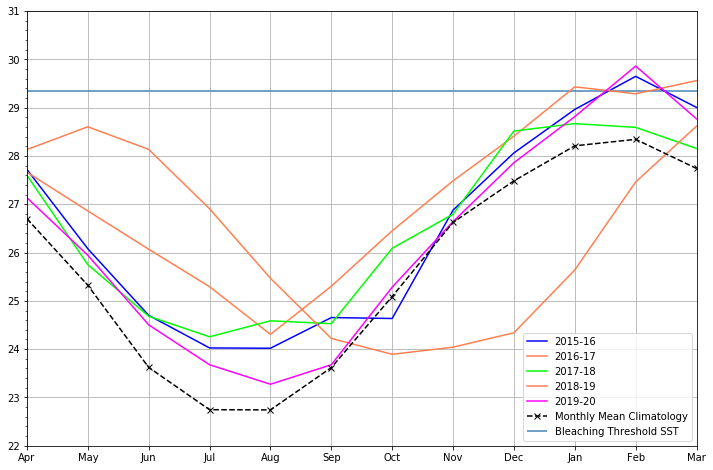

In [12]:
fig,ax = plt.subplots(figsize=(12,8))

ax.plot(x_axis, month_avg_2015_16['SST@90th_HS'], label='2015-16', color='blue')
ax.plot(x_axis, month_avg_2016_17['SST@90th_HS'], label='2016-17', color='coral')
ax.plot(x_axis, month_avg_2017_18['SST@90th_HS'], label='2017-18', color='lime')
ax.plot(x_axis, month_avg_2018_19['SST@90th_HS'], label='2018-19', color='coral')
ax.plot(x_axis, month_avg_2019_20['SST@90th_HS'], label='2019-20', color='fuchsia')

ax.plot(x_axis, modified_averaged_monthly_mean, color = 'black',
        marker = 'x', linestyle='dashed', label='Monthly Mean Climatology')
ax.hlines(bleaching_threshold, 1, 12, color='steelblue', label='Bleaching Threshold SST')
ax.set_xticks(x_axis)
ax.set_xticklabels(months)
ax.set_yticks(np.arange(22,31,0.2),minor=True)
plt.xlim(1,12)
plt.ylim(22,31)
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

#### Null Hypothesis: There is no significant change in the SST over the last five years

In [39]:
# Daily data for summer months (Dec - March) for each year
summer_2015_16 = five_year_data.loc['12/1/2015':'3/31/2016']['SST@90th_HS']
summer_2016_17 = five_year_data.loc['12/1/2016':'3/31/2017']['SST@90th_HS']
summer_2017_18 = five_year_data.loc['12/1/2017':'3/31/2018']['SST@90th_HS']
summer_2018_19 = five_year_data.loc['12/1/2018':'3/31/2019']['SST@90th_HS']
summer_2019_20 = five_year_data.loc['12/1/2019':'3/31/2020']['SST@90th_HS']

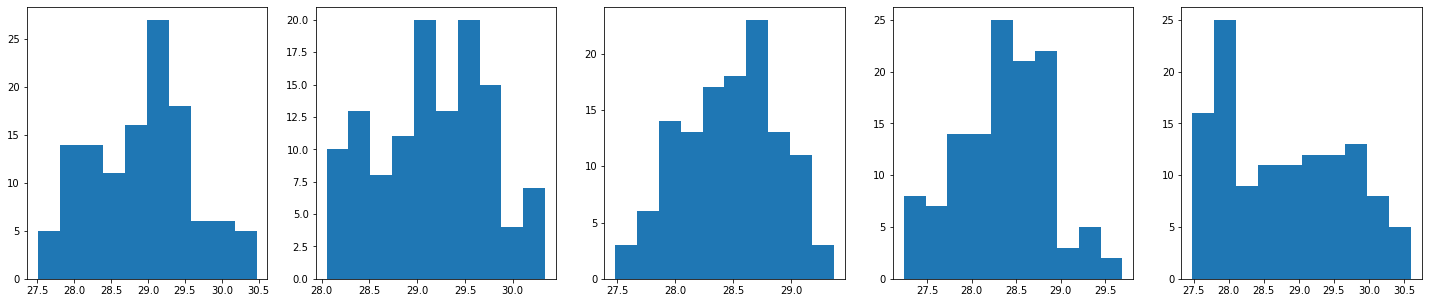

Summer 2015_16: NormaltestResult(statistic=1.0737755504124817, pvalue=0.5845647210968616)
Summer 2016_17: NormaltestResult(statistic=1.6632594767672122, pvalue=0.43533921883175897)
Summer 2017_18: NormaltestResult(statistic=0.1043062208092087, pvalue=0.9491835258428782)
Summer 2018_19: NormaltestResult(statistic=0.03847445005129467, pvalue=0.9809466295495344)
Summer 2019_20: NormaltestResult(statistic=19.800604723172317, pvalue=5.015951345304082e-05)


In [40]:
# Checking if the summer data for each year follows a normal ditribution
fig, axes = plt.subplots(1,5, figsize=(25,5))
axes[0].hist(summer_2015_16)
axes[1].hist(summer_2016_17)
axes[2].hist(summer_2017_18)
axes[3].hist(summer_2018_19)
axes[4].hist(summer_2019_20)
plt.show()
print(f'Summer 2015_16: {sts.normaltest(summer_2015_16.sample(50))}')
print(f'Summer 2016_17: {sts.normaltest(summer_2016_17.sample(50))}')
print(f'Summer 2017_18: {sts.normaltest(summer_2017_18.sample(50))}')
print(f'Summer 2018_19: {sts.normaltest(summer_2018_19.sample(50))}')
print(f'Summer 2019_20: {sts.normaltest(summer_2019_20.sample(50))}')

In [51]:
summer_2015_16_df = summer_2015_16.reset_index()
summer_2016_17_df = summer_2016_17.reset_index()
summer_2017_18_df = summer_2017_18.reset_index()
summer_2018_19_df = summer_2018_19.reset_index()
summer_2019_20_df = summer_2019_20.reset_index()

In [92]:
# Creating a combined DataFrame for Summer Months (Dec-March) for five years to plot a boxplot
summer_2015_16_df['Year'] = '2015-16'
summer_2016_17_df['Year'] = '2016-17'
summer_df = pd.merge(summer_2015_16_df, summer_2016_17_df,how='outer') #merging df for 2015_16 and 2016_17

summer_2017_18_df['Year'] = '2017-18'
summer_df = pd.merge(summer_df, summer_2017_18_df, how='outer')

summer_2018_19_df['Year'] = '2018-19'
summer_df = pd.merge(summer_df, summer_2018_19_df, how='outer')

summer_2019_20_df['Year'] = '2019-20'
summer_df = pd.merge(summer_df, summer_2019_20_df, how='outer')

summer_df.to_csv('Output/DataFiles/Summer_DF_Central_GBR.csv')

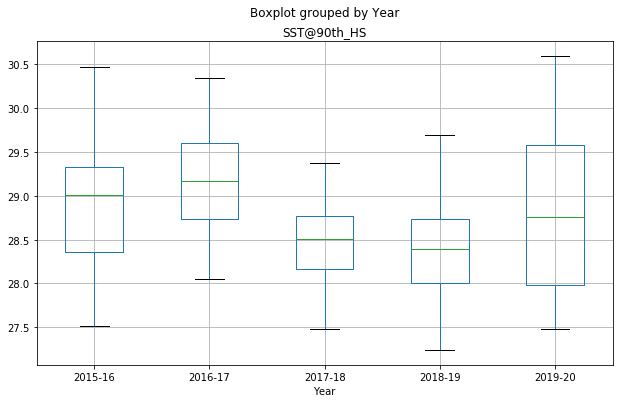

In [93]:
summer_df.boxplot("SST@90th_HS", by="Year", figsize=(10, 6))
plt.show()

In [94]:
sts.f_oneway(summer_2015_16, summer_2016_17, summer_2017_18, summer_2018_19, summer_2019_20)

F_onewayResult(statistic=31.862851358175284, pvalue=4.224088596903869e-24)

Assuming 5% significance level, we reject the Null Hypotestis as pvalue < 0.05

In [95]:
# sts.ttest_ind(summer_2015_16, summer_2016_17, equal_var=False)

In [96]:
# sts.ttest_ind(summer_2017_18, summer_2018_19, equal_var=False)

In [97]:
# sts.ttest_ind(summer_2016_17, summer_2018_19, equal_var=True)

In [98]:
# sts.ttest_ind(summer_2018_19, summer_2019_20, equal_var=True)